In [3]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Exercises

## Exercise

Suppose $f$ is smooth (i.e. infinitely differentiable) on some interval $[x-\epsilon,x+\epsilon]$. By considering
a numerical example, find out the largest value of $n$ for which this identity holds.

$f^\prime(x) = \frac{-f(x+2h) + 8 f(x+h) - 8 f(x-h) + f(x-2h)}{12 h } + O(h^n)$

for $h<\epsilon$. Store the value in a variable called $n$.

4.000122982244208


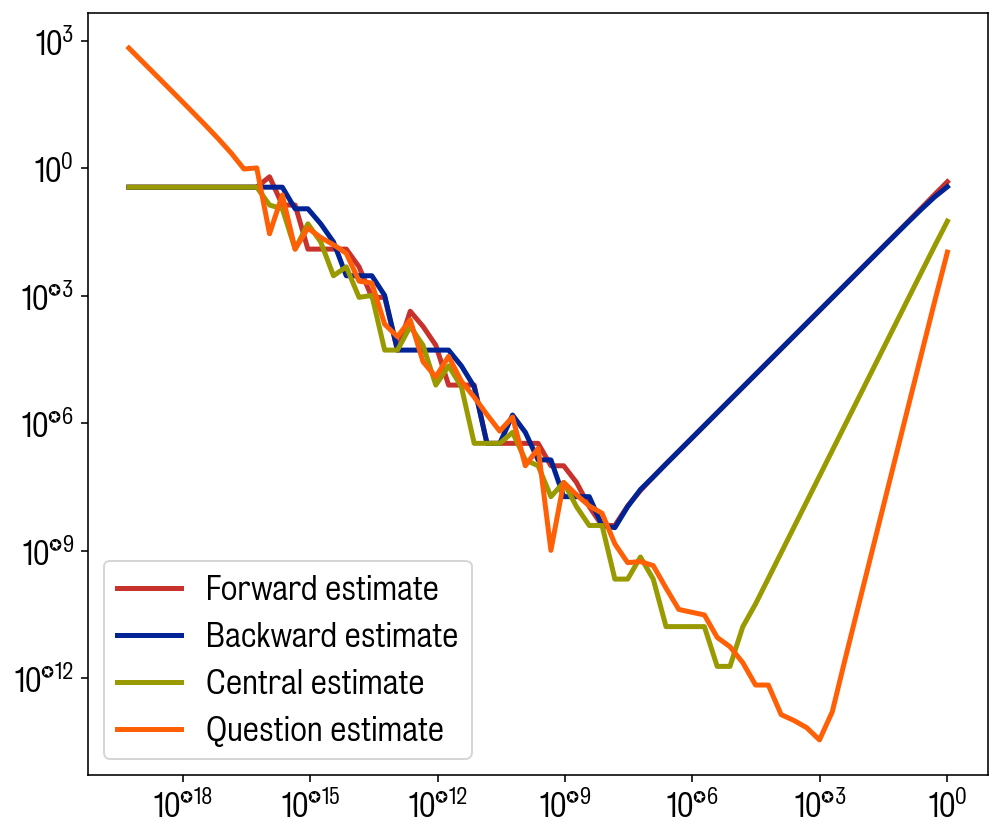

In [11]:
# BEGIN SOLUTION
n_points = 65
hVals = np.zeros(n_points)
errorF = np.zeros(n_points)
errorB = np.zeros(n_points)
errorC = np.zeros(n_points)
errorQ = np.zeros(n_points)
x = 1.2
for i in range(0,n_points):
    h = 2**(-i)
    hVals[i] = h
    errorF[i] = abs((sin(x+h)-sin(x))/h - cos(x))
    errorB[i] = abs((sin(x)-sin(x-h))/h - cos(x))
    errorC[i] = abs((sin(x+h)-sin(x-h))/(2*h) - cos(x))
    errorQ[i] = abs((-sin(x+2*h)+8*sin(x+h) - 8*sin(x-h) + sin(x-2*h))/(12*h) - cos(x))

plt.loglog(hVals,errorF,label='Forward estimate')
plt.loglog(hVals,errorB,label='Backward estimate')
plt.loglog(hVals,errorC,label='Central estimate')
plt.loglog(hVals,errorQ,label='Question estimate')
plt.gca().set_aspect('equal')
plt.legend();

gradient = (log(errorQ[8])-log(errorQ[2]))/(log(hVals[8])-log(hVals[2]))
print( gradient )
n = 4
# END SOLUTION

In [14]:
# Hidden test
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(n,4,decimal=1)
### END HIDDEN TESTS

## Exercise

Prove using Taylor's theorem that

$$f^{\prime \prime}(x) = \frac{f(x+h) -2 f(x) + f(x-h)}{h^2} + O(h)$$

for 3 times continuously differentiable functions $f$ defined on some interval $[x-\epsilon, x+\epsilon]$.

Without loss of generality $x=0$. Using Taylor's Theorem with remainder

$$
\begin{split}
\frac{f(0+h)-2f(0)+f(0-h)}{h^2} &= \frac{1}{h^2} \left( f(0) + f^\prime(0)h + \frac{1}{2}f^{\prime \prime}(0)h^2 + \frac{1}{6}f^{\prime\prime\prime}(\xi_h) h^3 
\right. \\
&\qquad - 2 f(0) \\
&\qquad + \left. f(0) -  f^\prime(0)h + \frac{1}{2}f^{\prime \prime}(0)h^2 - \frac{1}{6}f^{\prime\prime\prime}(\xi_{-h}) h^3 \right) \\
&= f^{\prime\prime}(0) + \frac{1}{6}(f^{\prime\prime\prime}(\xi_h) - f^{\prime\prime\prime}(\xi_{-h}) ) h \\
&= f^{\prime\prime}(0) + O(h)
\end{split}
$$